In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/My Drive/ERA_V2/')

In [4]:
from utils import train_transforms,test_transforms,device,num_epochs,batch_size,num_epochs,criterion,plot_images,plot_accuracy

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 512

#kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,shuffle=False,num_workers=2,pin_memory=True)
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True,num_workers=2,pin_memory=True )

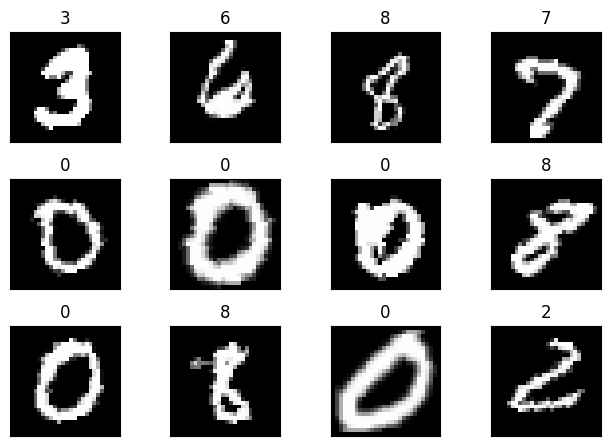

In [7]:
#import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

plot_images(batch_data,batch_label)

In [8]:
from model import Net,train,test

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
#num_epochs=2
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  acc,loss=train(model, device, train_loader, optimizer, criterion)
  train_acc.append(acc)
  train_losses.append(loss)
  tst_acc,tst_loss=test(model, device, train_loader, criterion)
  test_losses.append(tst_loss)
  test_acc.append(tst_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.4802 Batch_id=117 Accuracy=39.85: 100%|██████████| 118/118 [00:28<00:00,  4.17it/s]


Test set: Average loss: 0.4963, Accuracy: 50637/60000 (84.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1817 Batch_id=117 Accuracy=93.08: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.1380, Accuracy: 57418/60000 (95.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0630 Batch_id=117 Accuracy=96.22: 100%|██████████| 118/118 [00:22<00:00,  5.28it/s]


Test set: Average loss: 0.1287, Accuracy: 57602/60000 (96.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0959 Batch_id=117 Accuracy=97.00: 100%|██████████| 118/118 [00:23<00:00,  5.12it/s]


Test set: Average loss: 0.0857, Accuracy: 58429/60000 (97.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0531 Batch_id=117 Accuracy=97.48: 100%|██████████| 118/118 [00:22<00:00,  5.35it/s]


Test set: Average loss: 0.0687, Accuracy: 58742/60000 (97.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0766 Batch_id=117 Accuracy=97.82: 100%|██████████| 118/118 [00:22<00:00,  5.35it/s]


Test set: Average loss: 0.0644, Accuracy: 58776/60000 (97.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0449 Batch_id=117 Accuracy=98.05: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0537, Accuracy: 58961/60000 (98.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0566 Batch_id=117 Accuracy=98.26: 100%|██████████| 118/118 [00:22<00:00,  5.36it/s]


Test set: Average loss: 0.0531, Accuracy: 58959/60000 (98.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1010 Batch_id=117 Accuracy=98.32: 100%|██████████| 118/118 [00:22<00:00,  5.32it/s]


Test set: Average loss: 0.0487, Accuracy: 59072/60000 (98.45%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0267 Batch_id=117 Accuracy=98.43: 100%|██████████| 118/118 [00:21<00:00,  5.45it/s]


Test set: Average loss: 0.0449, Accuracy: 59157/60000 (98.59%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0251 Batch_id=117 Accuracy=98.62: 100%|██████████| 118/118 [00:21<00:00,  5.44it/s]


Test set: Average loss: 0.0415, Accuracy: 59188/60000 (98.65%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0294 Batch_id=117 Accuracy=98.66: 100%|██████████| 118/118 [00:21<00:00,  5.52it/s]


Test set: Average loss: 0.0406, Accuracy: 59208/60000 (98.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0288 Batch_id=117 Accuracy=98.67: 100%|██████████| 118/118 [00:21<00:00,  5.51it/s]


Test set: Average loss: 0.0370, Accuracy: 59302/60000 (98.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0627 Batch_id=117 Accuracy=98.77: 100%|██████████| 118/118 [00:21<00:00,  5.53it/s]


Test set: Average loss: 0.0364, Accuracy: 59308/60000 (98.85%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0733 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [00:21<00:00,  5.58it/s]


Test set: Average loss: 0.0399, Accuracy: 59247/60000 (98.75%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0391 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]


Test set: Average loss: 0.0289, Accuracy: 59445/60000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0182 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:20<00:00,  5.66it/s]


Test set: Average loss: 0.0284, Accuracy: 59488/60000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0226 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:20<00:00,  5.63it/s]


Test set: Average loss: 0.0279, Accuracy: 59505/60000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0131 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:20<00:00,  5.62it/s]


Test set: Average loss: 0.0264, Accuracy: 59485/60000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0158 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:20<00:00,  5.74it/s]


Test set: Average loss: 0.0261, Accuracy: 59536/60000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.


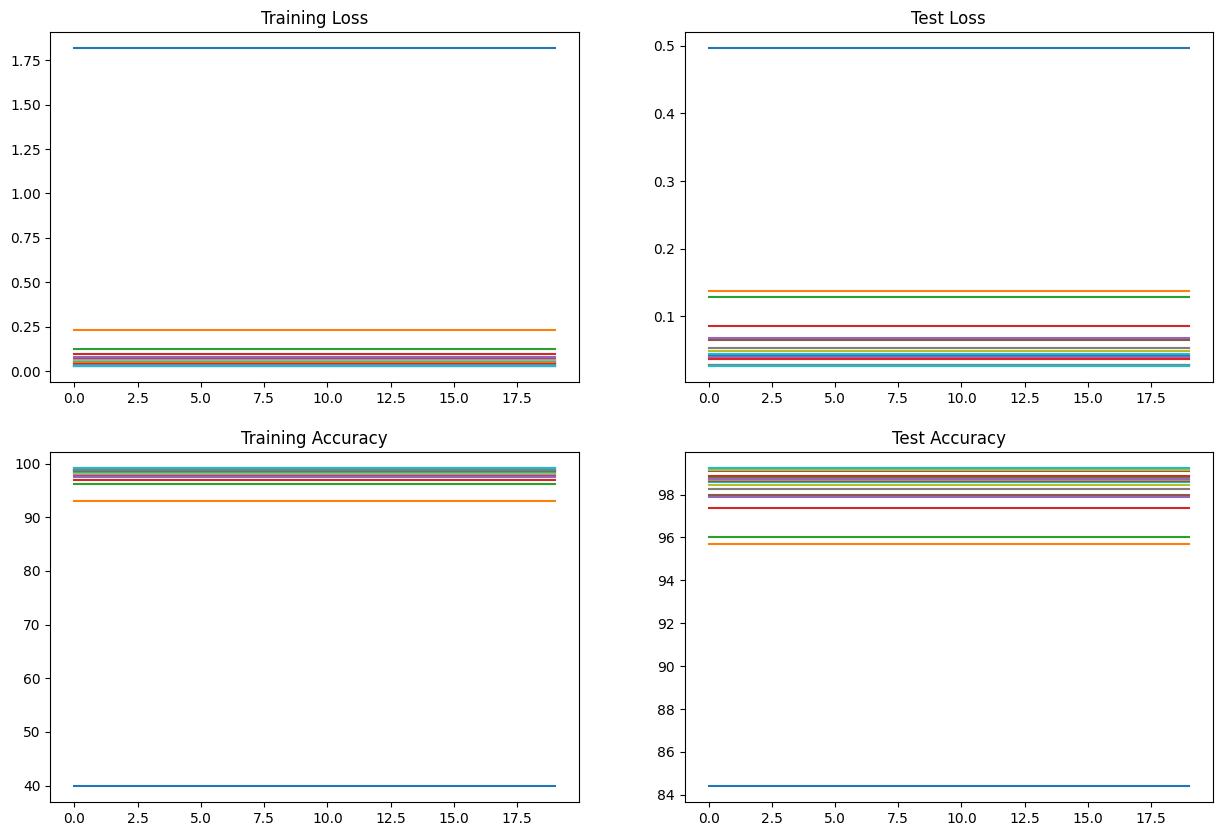

In [10]:
plot_accuracy(train_acc,train_losses,test_acc,test_losses)